In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from fastai.structured import *
from fastai.column_data import *
import pandas as pd
np.set_printoptions(threshold=50, edgeitems=20)

PATH = 'fixed/data/'

In [4]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [5]:
df=pd.read_pickle('12_gmm.pkl')

In [6]:
means = pd.read_pickle('gmm_means_12.pkl')

In [7]:
clusters = df.cluster

In [8]:
set(clusters)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [9]:
cluster_0 = df[df.cluster == 0]
cluster_1 = df[df.cluster == 1]
cluster_2 = df[df.cluster == 2]
cluster_3 = df[df.cluster == 3]
cluster_4 = df[df.cluster == 4]
cluster_5 = df[df.cluster == 5]
cluster_6 = df[df.cluster == 6]
cluster_7 = df[df.cluster == 7]
cluster_8 = df[df.cluster == 8]
cluster_9 = df[df.cluster == 9]
cluster_10 = df[df.cluster == 10]
cluster_11 = df[df.cluster == 11]


In [11]:
cluster_5.shape

(95080, 14)

In [12]:
cat_vars = ['atom_name', 'residue_name',
       'residue_number','element_symbol']

In [13]:
contin_vars = ['x_coord', 'y_coord', 'z_coord','x_ca', 'y_ca', 'z_ca']

In [14]:
for v in cat_vars: cluster_5[v] = cluster_5[v].astype('category').cat.as_ordered()

/home/b/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
for v in contin_vars:
    cluster_5[v] = cluster_5[v].fillna(0).astype('float32')

/home/b/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
cluster_5.columns

Index(['atom_number', 'atom_name', 'residue_name', 'chain_id',
       'residue_number', 'x_coord', 'y_coord', 'z_coord', 'b_factor',
       'element_symbol', 'x_ca', 'y_ca', 'z_ca', 'cluster'],
      dtype='object')

In [24]:
y=cluster_5.drop(['atom_name', 'residue_name', 'chain_id', 'residue_number','b_factor', 'atom_number','element_symbol', 'x_ca', 'y_ca', 'z_ca','cluster'],axis=1)
y.head()

,x_coord,y_coord,z_coord
0,-17.931999,5.235,4.057
1,-19.289000,5.514,3.562
2,-19.341999,6.462,2.300
3,-19.767000,6.029,1.234
4,-20.099001,6.097,4.709


In [25]:
y=y.values

In [26]:
train_cats(cluster_5)

/home/b/anaconda3/envs/fastai/lib/python3.6/site-packages/fastai/structured.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()


In [27]:
cluster_5.head()

,atom_number,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,element_symbol,x_ca,y_ca,z_ca,cluster
0,1,N,PHE,1,1,-17.931999,5.235,4.057,0.0,N,-19.289,5.514,3.562,5
1,2,CA,PHE,1,1,-19.289000,5.514,3.562,0.0,C,-19.289,5.514,3.562,5
2,3,C,PHE,1,1,-19.341999,6.462,2.300,0.0,C,-19.289,5.514,3.562,5
3,4,O,PHE,1,1,-19.767000,6.029,1.234,0.0,O,-19.289,5.514,3.562,5
4,5,CB,PHE,1,1,-20.099001,6.097,4.709,0.0,C,-19.289,5.514,3.562,5


In [28]:
cluster_5=cluster_5.drop(['x_coord','y_coord', 'z_coord','cluster','chain_id'],axis=1)
cluster_5.head(10)

,atom_number,atom_name,residue_name,residue_number,b_factor,element_symbol,x_ca,y_ca,z_ca
0,1,N,PHE,1,0.0,N,-19.289,5.514,3.562
1,2,CA,PHE,1,0.0,C,-19.289,5.514,3.562
2,3,C,PHE,1,0.0,C,-19.289,5.514,3.562
3,4,O,PHE,1,0.0,O,-19.289,5.514,3.562
4,5,CB,PHE,1,0.0,C,-19.289,5.514,3.562
5,6,CG,PHE,1,0.0,C,-19.289,5.514,3.562
6,7,CD1,PHE,1,0.0,C,-19.289,5.514,3.562
7,8,CD2,PHE,1,0.0,C,-19.289,5.514,3.562
8,9,CE1,PHE,1,0.0,C,-19.289,5.514,3.562
9,10,CE2,PHE,1,0.0,C,-19.289,5.514,3.562


In [29]:
cluster_5=cluster_5.drop(['atom_number'],axis=1)
cluster_5.head()

,atom_name,residue_name,residue_number,b_factor,element_symbol,x_ca,y_ca,z_ca
0,N,PHE,1,0.0,N,-19.289,5.514,3.562
1,CA,PHE,1,0.0,C,-19.289,5.514,3.562
2,C,PHE,1,0.0,C,-19.289,5.514,3.562
3,O,PHE,1,0.0,O,-19.289,5.514,3.562
4,CB,PHE,1,0.0,C,-19.289,5.514,3.562


In [30]:
cluster_5_1, d, nas, mapper = proc_df(cluster_5, 'b_factor', do_scale=True)

In [31]:
# train_ratio = 0.75
train_ratio = 0.9
train_size = int(len(cluster_5_1) * train_ratio); train_size
val_idx = list(range(train_size, len(cluster_5_1)))

In [32]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, cluster_5_1, y.astype(np.float32), cat_flds=cat_vars, bs=64)

In [33]:
cat_sz = [(c, len(cluster_5[c].cat.categories)+1) for c in cat_vars]

In [34]:
cat_sz

[('atom_name', 83),
 ('residue_name', 21),
 ('residue_number', 431),
 ('element_symbol', 6)]

In [35]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [36]:
emb_szs

[(83, 42), (21, 11), (431, 50), (6, 3)]

In [38]:
m = md.get_learner(emb_szs, 3,0.2, 3, [1000,500], [0.1,0.1])

In [39]:
m.crit = F.mse_loss

In [40]:
m.lr_find()

 56%|█████▌    | 749/1338 [00:07<00:04, 145.43it/s, loss=22.2]


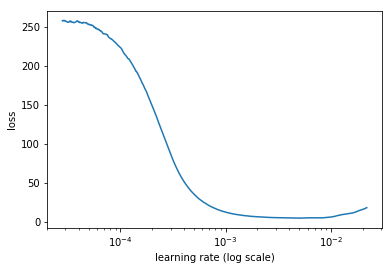

In [41]:
m.sched.plot(100)

In [42]:
lr = 6e-4
wd = 0

In [43]:
m.fit(lr, 20, wds=wd, cycle_len=5)

epoch      trn_loss   val_loss                                 
    0      3.780331   2.852146  
    1      3.177733   2.616218                                 
    2      2.987096   2.522591                                 
    3      2.866918   2.481394                                 
    4      2.792097   2.480594                                 
    5      3.001048   2.713884                                 
    6      2.765841   2.669432                                 
    7      2.709745   2.687287                                 
    8      2.584872   2.629783                                 
    9      2.511117   2.627052                                 
    10     2.638503   2.758225                                 
    11     2.52293    2.703832                                 
    12     2.459943   2.738436                                 
    13     2.392817   2.709404                                 
    14     2.331367   2.701591                                 
    15 

KeyboardInterrupt: 

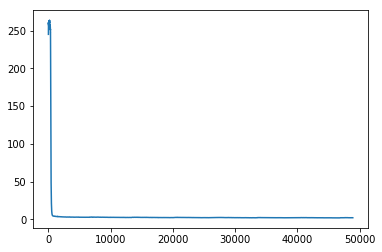

 56%|█████▌    | 747/1338 [00:20<00:03, 169.48it/s, loss=2.13]

In [45]:
m.sched.plot_loss()

In [87]:
m.save('m_ca_best')

In [85]:
m = md.get_learner(emb_szs, 3,0.2, 3, [1000,500,500,500,500,500], [0.2,0.3])

In [46]:
e = m.model
e.eval()

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(83, 42)
    (1): Embedding(21, 11)
    (2): Embedding(431, 50)
    (3): Embedding(6, 3)
  )
  (lins): ModuleList(
    (0): Linear(in_features=109, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=3, bias=True)
  (emb_drop): Dropout(p=0.2)
  (drops): ModuleList(
    (0): Dropout(p=0.1)
    (1): Dropout(p=0.1)
  )
  (bn): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True)
)

In [67]:
m.model.eval()

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(83, 42)
    (1): Embedding(21, 11)
    (2): Embedding(431, 50)
    (3): Embedding(6, 3)
  )
  (lins): ModuleList(
    (0): Linear(in_features=109, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=3, bias=True)
  (emb_drop): Dropout(p=0.2)
  (drops): ModuleList(
    (0): Dropout(p=0.1)
    (1): Dropout(p=0.1)
  )
  (bn): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True)
)

In [68]:
x,y = m.predict_with_targs()

In [69]:
x

array([[ 18.07607, -18.42061,  25.84624],
       [ 18.03741, -17.99319,  26.20824],
       [ 17.74832, -17.90798,  26.1785 ],
       [ 17.56156, -19.11627,  25.4136 ],
       [ 18.56806, -20.57084,  27.96943],
       [ 18.66256, -20.82437,  28.06692],
       [ 18.35424, -20.46964,  28.15272],
       [ 19.15389, -21.48593,  27.76964],
       [ 19.59497, -21.83833,  27.457  ],
       [ 20.32038, -21.93737,  26.56961],
       [ 20.25951, -21.50746,  26.46461],
       [ 20.28528, -21.44562,  26.32486],
       [ 17.61547, -22.91631,  25.93201],
       [ 17.35094, -23.14934,  26.22309],
       [ 17.52886, -23.10644,  26.24349],
       [ 17.30548, -22.99289,  26.19666],
       [ 16.90681, -23.53481,  25.94149],
       [ 16.72816, -23.44342,  25.42761],
       [ 16.54253, -23.79007,  25.57382],
       [ 17.92047, -21.65283,  22.42394],
       ...,
       [-18.82075, -33.11272, -20.01742],
       [-19.12996, -32.33599, -20.2548 ],
       [-21.62533, -32.67615, -21.54106],
       [-21.69989, -32

In [70]:
y= y.reshape(9508,3)

In [71]:
y

array([[ 18.027, -17.26 ,  25.996],
       [ 18.659, -18.486,  26.662],
       [ 19.738, -18.898,  26.271],
       [ 18.139, -16.01 ,  26.875],
       [ 17.97 , -19.1  ,  27.627],
       [ 18.485, -20.306,  28.283],
       [ 18.632, -21.513,  27.334],
       [ 17.591, -20.729,  29.461],
       [ 17.443, -19.718,  30.581],
       [ 14.461, -20.195,  31.723],
       [ 14.468, -18.858,  31.819],
       [ 13.286, -20.821,  31.601],
       [ 17.64 , -21.751,  26.47 ],
       [ 17.496, -23.038,  25.743],
       [ 17.58 , -22.968,  24.215],
       [ 17.737, -23.991,  23.541],
       [ 16.125, -23.662,  26.047],
       [ 15.096, -22.84 ,  25.483],
       [ 15.881, -23.79 ,  27.548],
       [ 17.431, -21.782,  23.65 ],
       ...,
       [-19.383, -33.752, -22.37 ],
       [-18.593, -33.682, -19.983],
       [-20.645, -33.407, -22.26 ],
       [-21.661, -33.957, -23.098],
       [-21.595, -33.476, -24.531],
       [-23.022, -33.64 , -22.497],
       [-20.528, -32.822, -24.921],
       [-20.85 ,

In [60]:
distance = y-x

In [61]:
distance_abs = abs(distance)

In [62]:
distance_abs.mean()

1.257241

/home/b/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


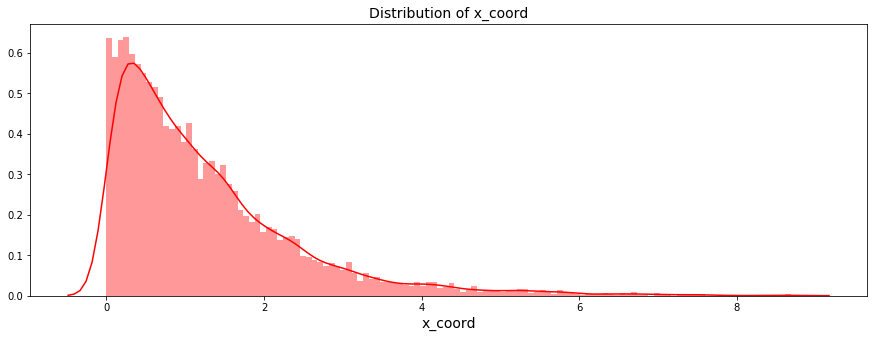

In [63]:
plt.figure(figsize=(15,5))
sns.distplot(abs(y[:,0]-x[:,0]), bins=120, color="r")
# sns.distplot(x[:,0], bins=120, color="b")
plt.xlabel('x_coord', fontsize=14);
plt.title("Distribution of x_coord", fontsize=14);
plt.show();

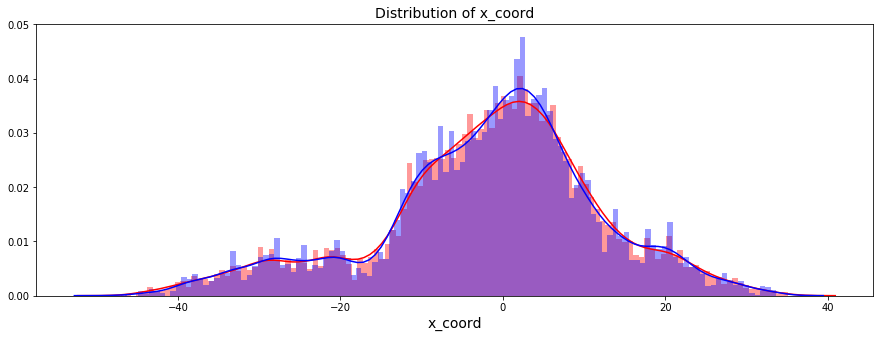

In [64]:
plt.figure(figsize=(15,5))
sns.distplot(y[:,0], bins=120, color="r")
sns.distplot(x[:,0], bins=120, color="b")
plt.xlabel('x_coord', fontsize=14);
plt.title("Distribution of x_coord", fontsize=14);
plt.show();

In [65]:
def idx2EmbPlot(idx,perplexity=30,early_exaggeration=12.0, learning_rate=200.0,ax=None):
    Embedding_matrix = to_np(next(m.get_layer_groups()[0][idx].parameters()))
    from sklearn.manifold import TSNE
    X_embedded = TSNE(n_components=2, perplexity=perplexity, early_exaggeration=early_exaggeration, 
                      learning_rate=learning_rate,n_iter=1000, n_iter_without_progress=300, 
                      min_grad_norm=1e-07,metric='euclidean', init='random', verbose=0, 
                      random_state=42, method='barnes_hut', angle=0.5).fit_transform(Embedding_matrix)
    
    annotation = np.append(df[df.columns[idx]].cat.categories.values,"Other")
    
    
    ax.scatter(X_embedded[:,0],X_embedded[:,1],c=range(len(annotation)),alpha=0.4)
    for xy,target in zip(X_embedded,annotation):
        if isinstance(target,np.str_) or isinstance(target,str):
            text = target
        else:
            text = "%d" % target
        ax.annotate(target,xy=(xy[0],xy[1]))
        ax.set_title(df.columns[idx])

AttributeError: Can only use .cat accessor with a 'category' dtype

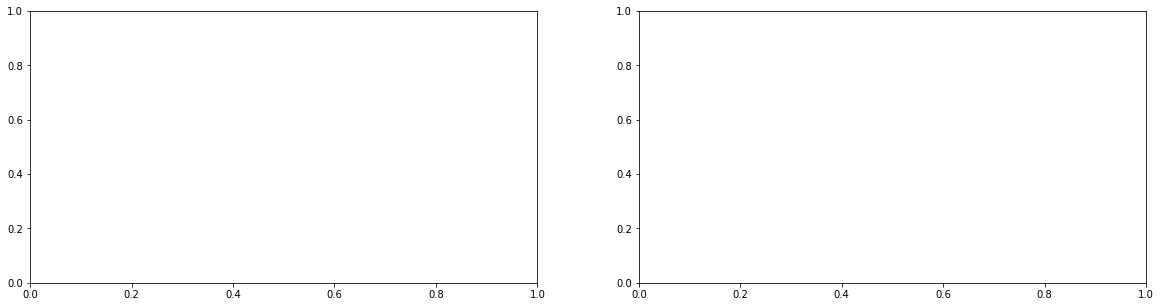

In [66]:
Perplexities = [2,4]

fig, axes = plt.subplots(nrows=1,ncols=len(Perplexities))
fig.set_figheight(5)
fig.set_figwidth(20)
for i,per in enumerate(Perplexities):
    idx2EmbPlot(0,per,ax=axes[i])

In [36]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [37]:
from plotly import tools

In [38]:
init_notebook_mode(connected=True)

In [39]:
p=pd.read_pickle('df_fixed.pkl')

In [40]:
p = p[:50000]

In [41]:
import plotly.plotly as py

scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",    
    x = p['x_coord'], y = p['y_coord'], z = p['z_coord'],
    marker = dict( size=2, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 7,
    name = "y",
    opacity = 0.1,
    type = "mesh3d",    
    x = p['x_coord'], y = p['y_coord'], z = p['z_coord']
)
layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
fig = dict( data=[scatter, clusters], layout=layout )
# Use py.iplot() for IPython notebook
py.iplot(fig, filename='3d point clustering')

/home/b/anaconda3/envs/fastai/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/home/b/anaconda3/envs/fastai/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types 

PlotlyRequestError: No message

In [6]:
from sklearn.cluster import KMeans

In [7]:
p=p.drop(['atom_name', 'residue_name', 'chain_id', 'residue_number','b_factor', 'atom_number','element_symbol', 'x_ca', 'y_ca', 'z_ca'],axis=1)
p.head()

,x_coord,y_coord,z_coord
0,-17.932,5.235,4.057
1,-19.289,5.514,3.562
2,-19.342,6.462,2.300
3,-19.767,6.029,1.234
4,-20.099,6.097,4.709


In [8]:
gmm = GaussianMixture(n_components=12)

NameError: name 'GaussianMixture' is not defined

In [112]:
gmm.fit(p)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=12, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [113]:
gmm_labels = gmm.predict(p)

In [114]:
set(gmm_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [115]:
print(gmm.means_)

[[  37.60757   30.7157    15.88834]
 [  36.16891   85.60786   52.19355]
 [  91.98587   63.71281  120.90816]
 [  20.29922   13.84847   46.13527]
 [   0.7287     7.71578    5.34563]
 [  -9.69728  -19.09858 -193.642  ]
 [  14.36095   16.98894   81.81541]
 [-164.6514   -51.52326   -8.65603]
 [  19.35105   50.17975   16.17223]
 [ -11.36992    4.94814    3.18316]
 [ 211.75562  233.41354  113.58586]
 [  97.1355     5.73044   -5.86704]]


In [9]:
km = KMeans(n_clusters=12,max_iter=600)

In [10]:
km.fit(p)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
print(km.cluster_centers_)

[[ -49.65548  -15.57096   13.77746]
 [  14.07302   11.96359   52.12814]
 [  40.68513   84.82733    8.63681]
 [  -9.56602  -19.09272 -193.34976]
 [  20.57797   18.6112   125.1022 ]
 [   3.87146   -2.03913   -0.99834]
 [  25.21099   76.34478   63.71561]
 [ 211.7562   233.41269  113.58542]
 [  47.99359   20.73343   14.90595]
 [ 110.26322   80.53003  140.54908]
 [ 124.08811   16.23416   15.0459 ]
 [  -5.58475   45.25528   13.42587]]


In [65]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = p.index.values
cluster_map['cluster'] = km.labels_

In [69]:
cluster_map.head(100)

,data_index,cluster
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,2
6,6,2
7,7,2
8,8,2
9,9,2


In [14]:
nump = np.array(p)

In [15]:
nump[:10]

array([[-17.932,   5.235,   4.057],
       [-19.289,   5.514,   3.562],
       [-19.342,   6.462,   2.3  ],
       [-19.767,   6.029,   1.234],
       [-20.099,   6.097,   4.709],
       [-21.559,   6.092,   4.496],
       [-22.286,   4.925,   4.67 ],
       [-22.231,   7.244,   4.111],
       [-23.668,   4.909,   4.479],
       [-23.625,   7.231,   3.923]])

/home/b/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


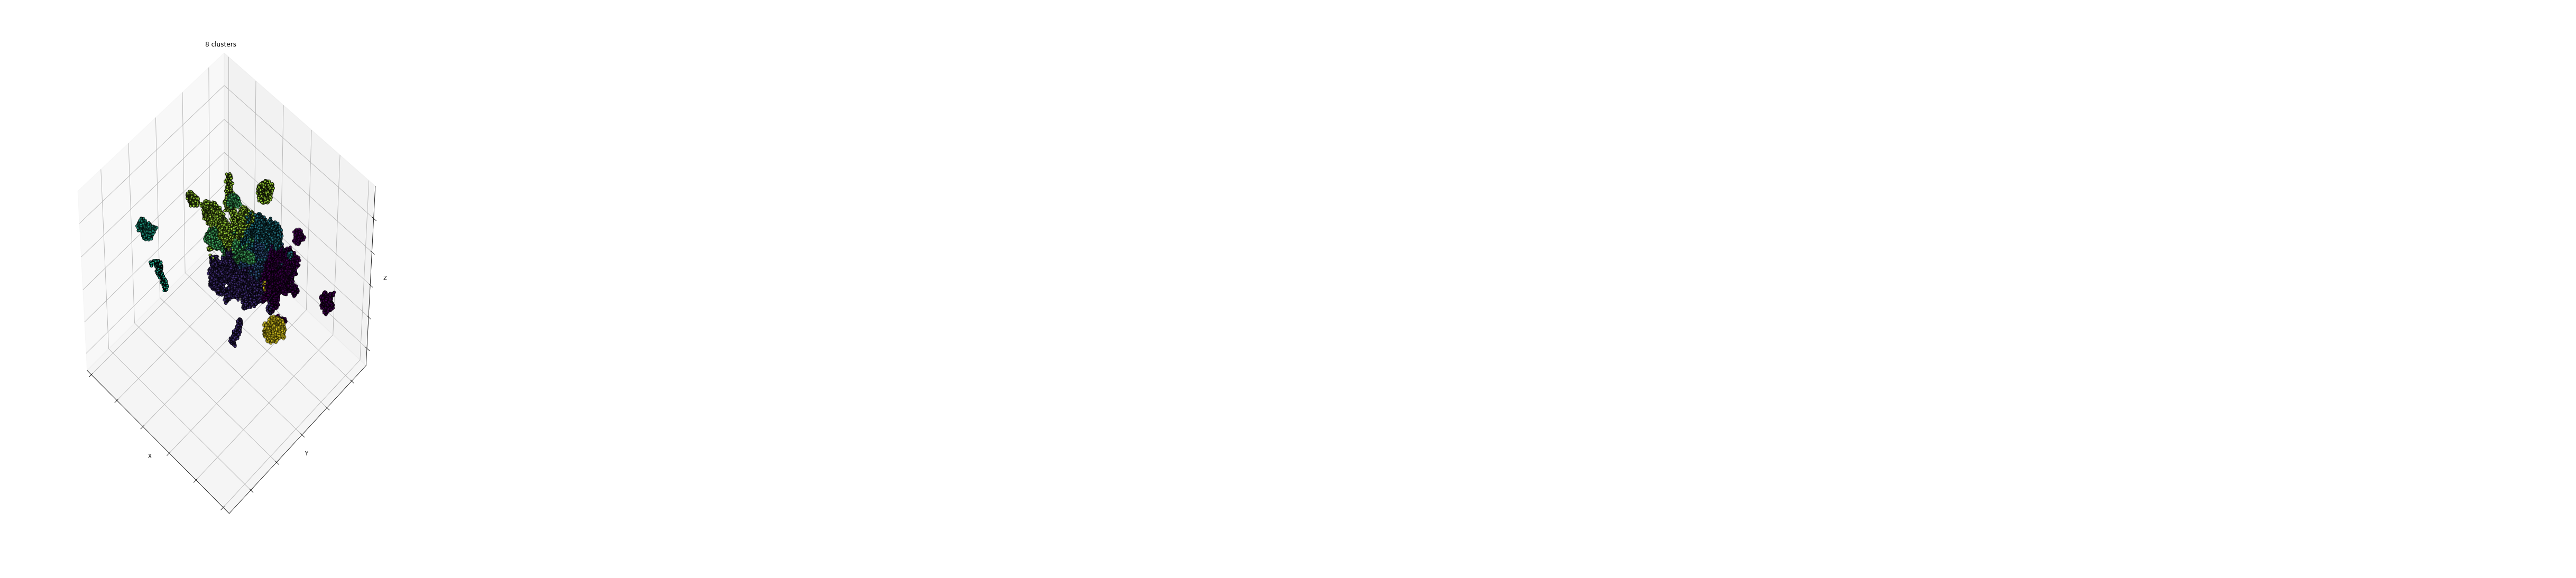

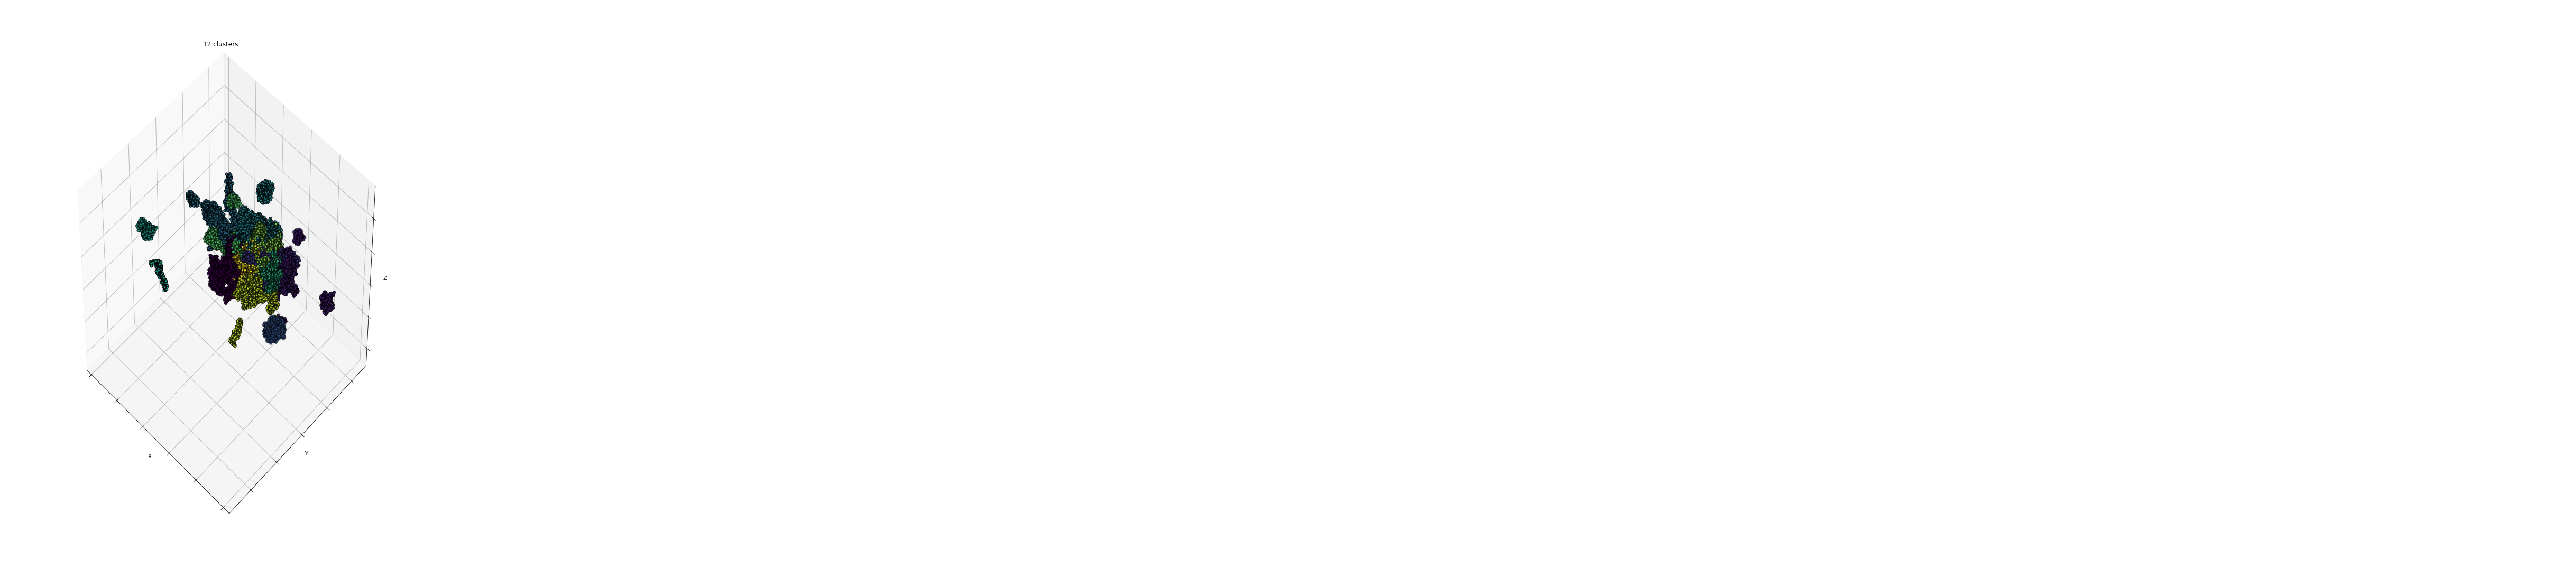

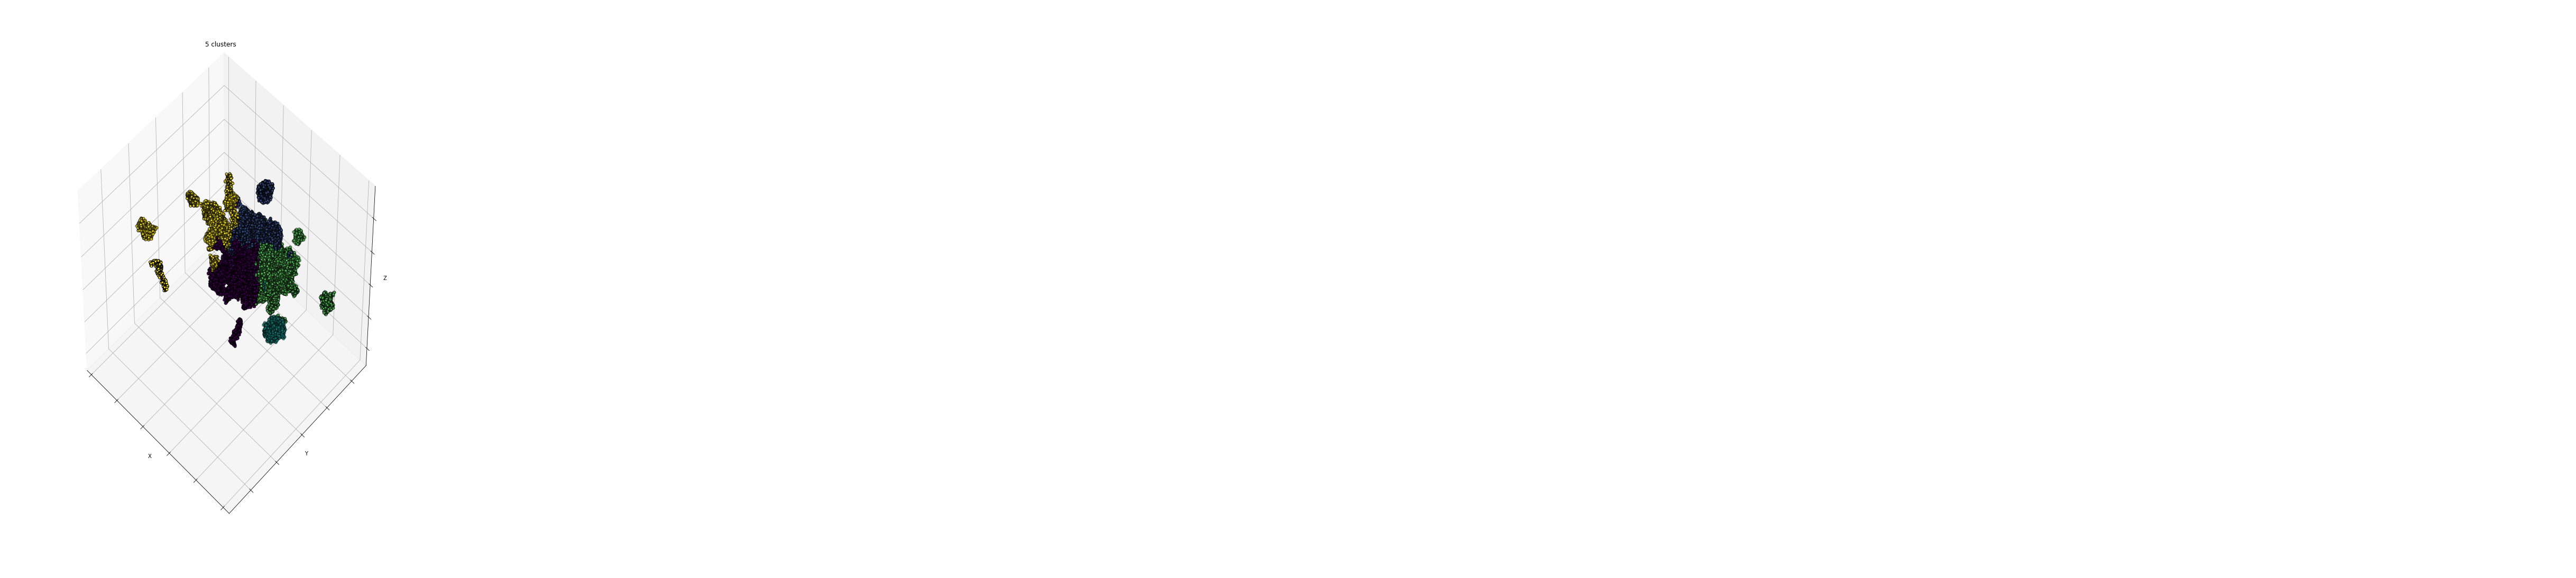

In [16]:
from mpl_toolkits.mplot3d import Axes3D
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_12', KMeans(n_clusters=12)),
              ('k_means_5', KMeans(n_clusters=5))]


fignum = 1
titles = ['8 clusters', '12 clusters', '5 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 15))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(nump)
    labels = est.labels_

    ax.scatter(nump[:, 0], nump[:, 1], nump[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.dist = 12

fig.show()